In [5]:
!python main.py  --model_name="S CNN512 LSTM_384_Linear (norm)" --test_noise_type=5 --test_SNR_type=1 --test_sample=9 --device="cpu"

Model './checkpoint/AutoEncoder/AE124_BiLSTM12NR S.pt' loaded.
Model './checkpoint/MultiModal/S CNN512 LSTM_384_Linear (norm).pt' loaded.
taiwan_3talker, n7dB, 9
PESQ:  2.258194923400879
STOI:  0.39735283099287616
ESTOI: 0.24259583628653347
<IPython.lib.display.Audio object>
<IPython.lib.display.Audio object>
Figure(1800x1200)
*** Error in `python': corrupted size vs. prev_size: 0x00005634f9f858d0 ***
Aborted (core dumped)


Model './checkpoint/AutoEncoder/PCA_AE16_BiLSTM32_L6NR S.pt' loaded.
Model './checkpoint/MultiModal/S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm n100 fix) (zero_pad).pt' loaded.
Model './checkpoint/MultiModal/S+E CNN512 EF cat0 LSTM_Unfold_Linear (norm).pt' loaded.


/home/alexchen/anaconda3/envs/ASR3_7/lib/python3.7/site-packages/torch/serialization.py:593: SourceChangeWarning: source code of class 'model.SeqUnfold' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


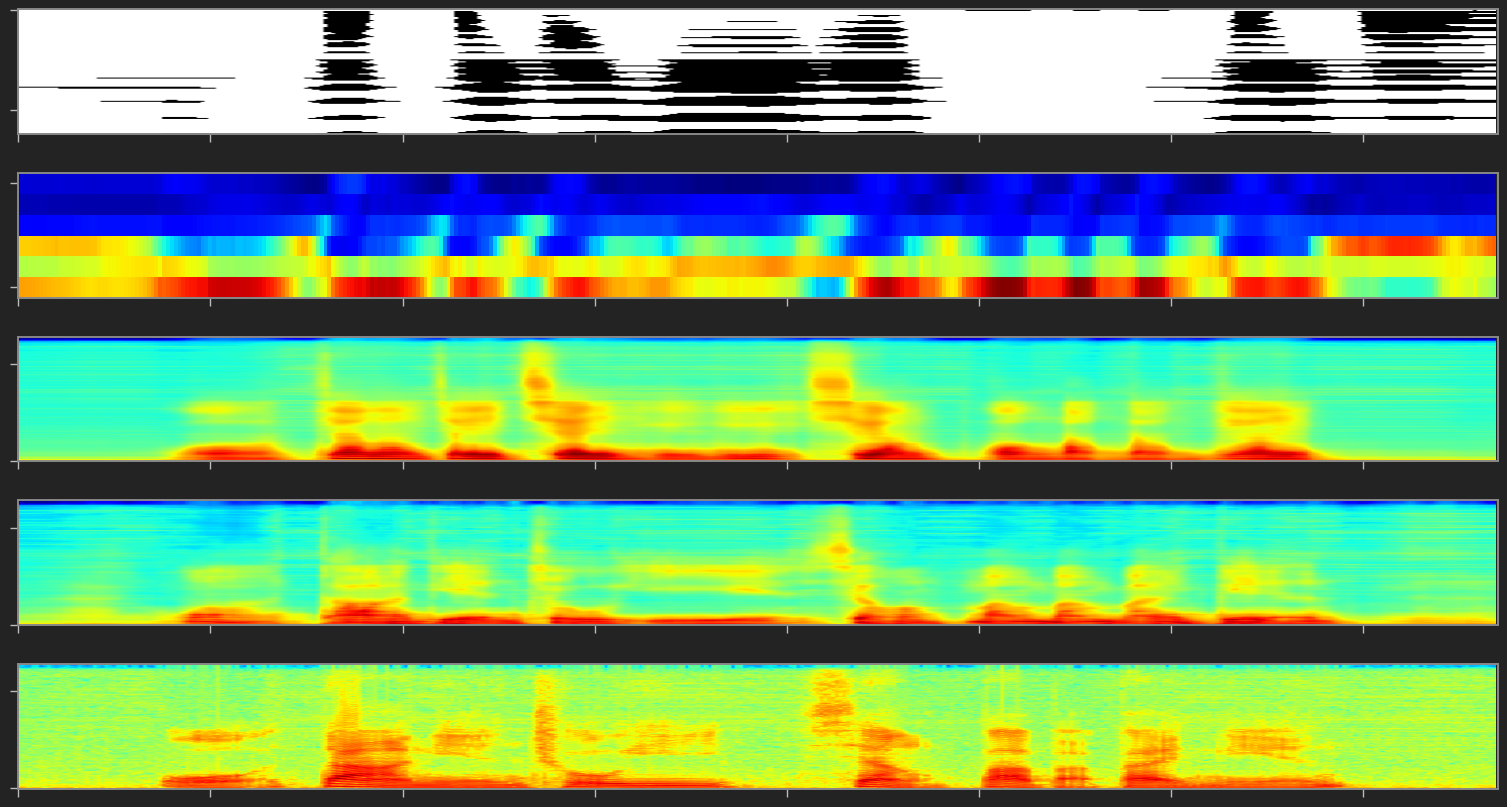

In [65]:
import matplotlib.pyplot as plt

from preprocess import *
from main import *
args.device = 'cuda:1'

def for_test():
    pca = pickle.load(open(os.path.join(args.AE_checkpoint_path, 'PCA16.pkl'), 'rb'))
    PCA_AE12, _, _ = AutoEncoder().load_model(
        os.path.join(args.AE_checkpoint_path, f'PCA_AE16_BiLSTM32_L6NR S.pt'),
        device=args.device
    )
    
    model_LF, e, v = MultiModal_SE().load_model(
        os.path.join(args.MM_checkpoint_path, f'S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm n100 fix) (zero_pad).pt'),
        args.device
    )
    model_LF.E_Encoder = PCA_AE12.Encoder
    
    model_EF, e, v = MultiModal_SE().load_model(
        os.path.join(args.MM_checkpoint_path, f'S+E CNN512 EF cat0 LSTM_Unfold_Linear (norm).pt'),
        args.device
    )

    test_sample = 11
    Sy, phasey, _, _ = load_wave_data(
        sample_id=test_sample,
        is_training=False, dataset_path=args.dataset_path, norm=False
    )

    elec_data = load_elec_data(test_sample, Sy.shape[1], (1, 124), args.dataset_path)
    elec_data_pca = pca.transform(elec_data)
    elec_data_pca = torch.Tensor([elec_data_pca]).to(args.device)

    elec_EF = torch.Tensor([elec_data]).to(args.device)
    elec_data = elec_data.T

    with torch.no_grad():
        for _ in range(2):
            _, Se_LF, _, Sy_LF, _ = model_LF(None, elec_data_pca)
            _, _, _, Sy_EF, _ = model_EF(None, elec_EF)

    Se_LF = Se_LF[0].cpu().detach().numpy().T
    Sy_EF = Sy_EF[0].cpu().detach().numpy().T
    Sy_LF = Sy_LF[0].cpu().detach().numpy().T

    show_data = [
        (elec_data, None, 'binary'),
        (Se_LF, 'lower', 'jet'),
        (Sy_LF, 'lower', 'jet'),
        (Sy_EF, 'lower', 'jet'),
        (Sy, 'lower', 'jet'),
    ]

    s, t = 60, Sy.shape[1] - 100
    f, axes = plt.subplots(len(show_data), 1, sharex=True, figsize=(15, 8))
    axes[0].set_xlim(0, t-s)#Sy.shape[1]

    for i, (data, origin, cmap) in enumerate(show_data):
        axes[i].xaxis.set_ticklabels([])
        axes[i].yaxis.set_ticklabels([])
#         plt.imshow(data, origin=origin, aspect='auto', cmap=cmap)
        axes[i].imshow(data[:,s:t], origin=origin, aspect='auto', cmap=cmap)

    plt.tick_params(axis='x', which='both', labelbottom=False)
    plt.tick_params(axis='y', which='both', labelleft=False)
    plt.tight_layout(pad=0.2, h_pad=1.0)
    plt.savefig(os.path.join('./checkpoint/AutoEncoder/', f'E_only_analysis.eps'))
    plt.show()

if __name__ == '__main__':
    for_test()

Model './checkpoint/AutoEncoder/AE124_BiLSTM12NR S.pt' loaded.
Model './checkpoint/AutoEncoder/PCA_AE16_BiLSTM32_L12NR S.pt' loaded.
Model './checkpoint/AutoEncoder/PCA_AE16_BiLSTM32_L6NR S.pt' loaded.
Model './checkpoint/MultiModal/S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm n100 fix) (zero_pad) test.pt' loaded.
taiwan_3talker, n10dB, 63
PESQ:  1.8658109903335571
STOI:  0.504867181356684
ESTOI: 0.15144240210875667


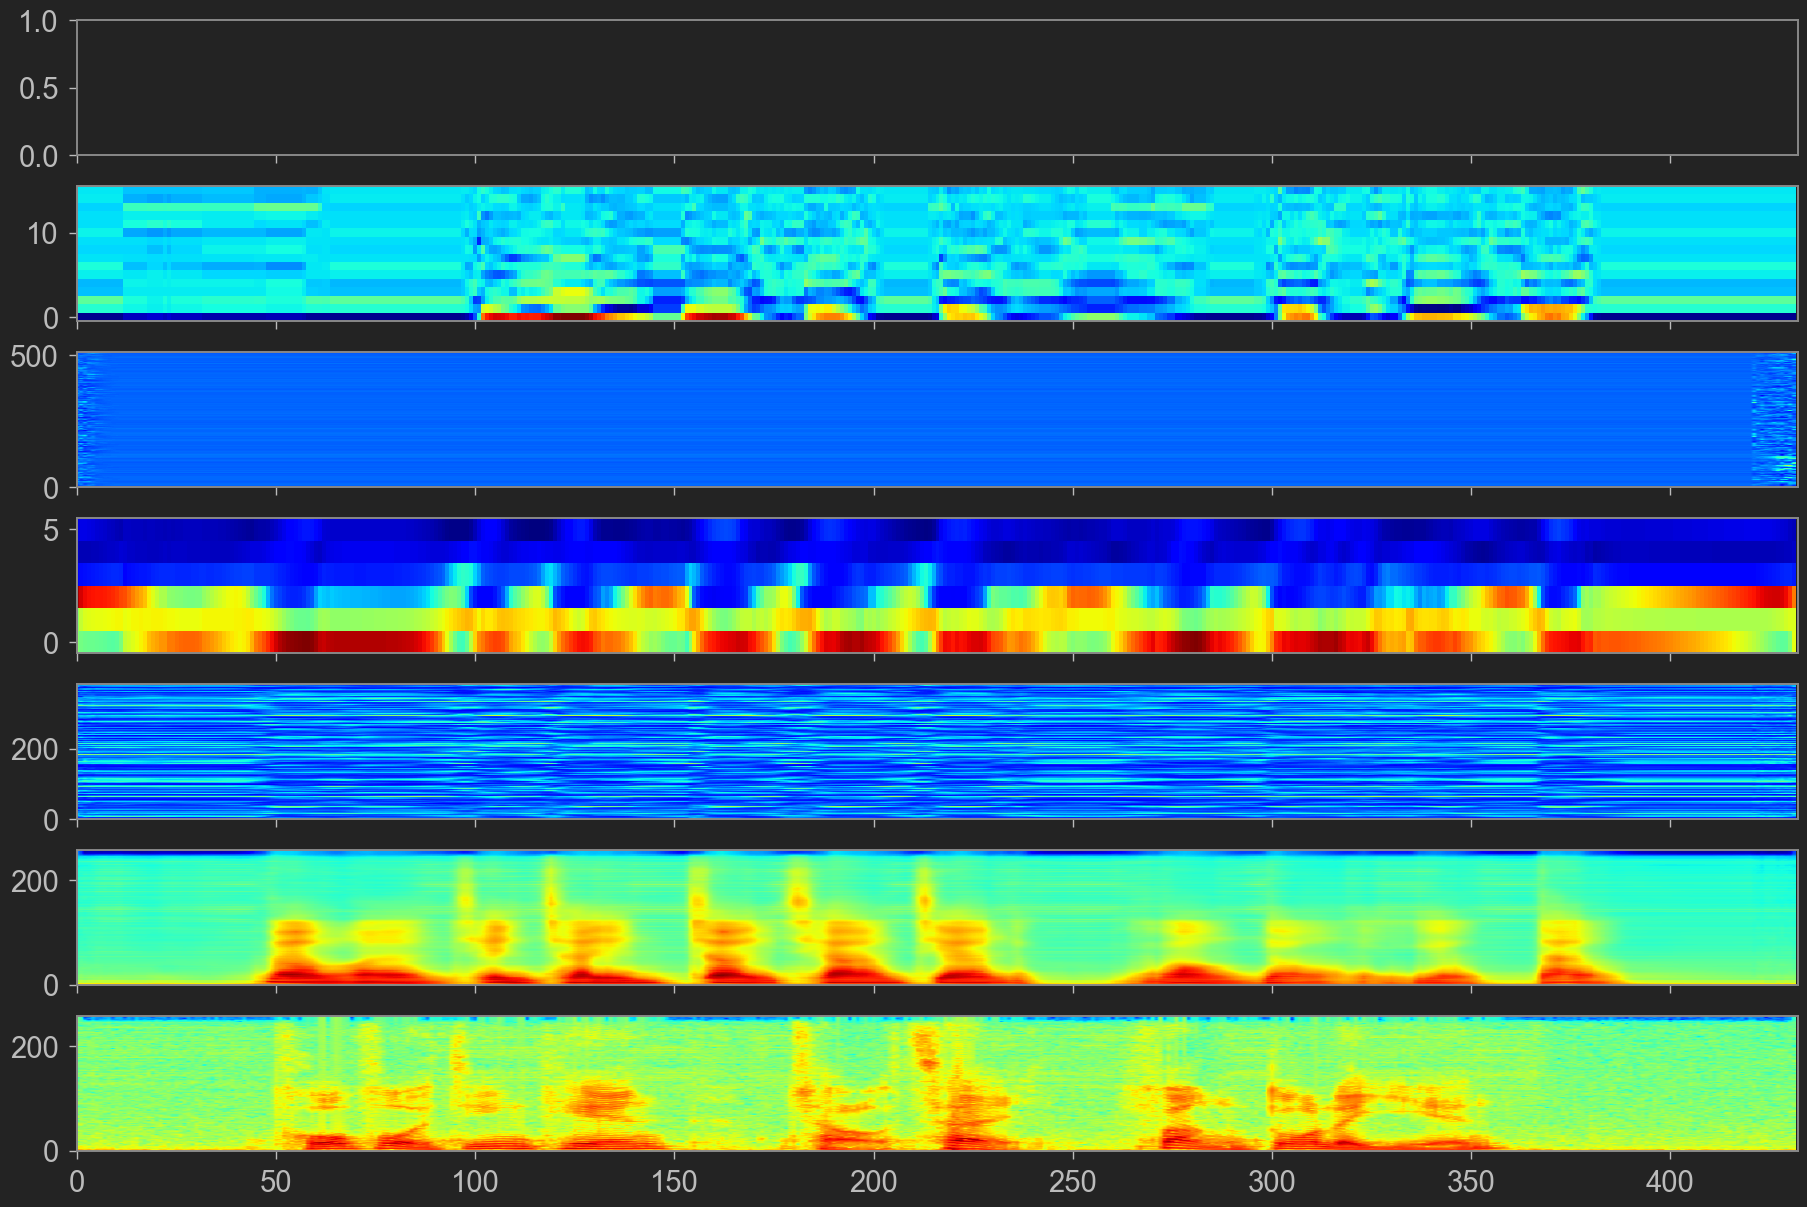

Model './checkpoint/MultiModal/S+E CNN512 EF cat0 LSTM_Unfold_Linear (norm).pt' loaded.
taiwan_3talker, n10dB, 63


/home/alexchen/anaconda3/envs/ASR3_7/lib/python3.7/site-packages/torch/serialization.py:593: SourceChangeWarning: source code of class 'model.SeqUnfold' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


PESQ:  1.6871685981750488
STOI:  0.5686155800460962
ESTOI: 0.23337027966290938


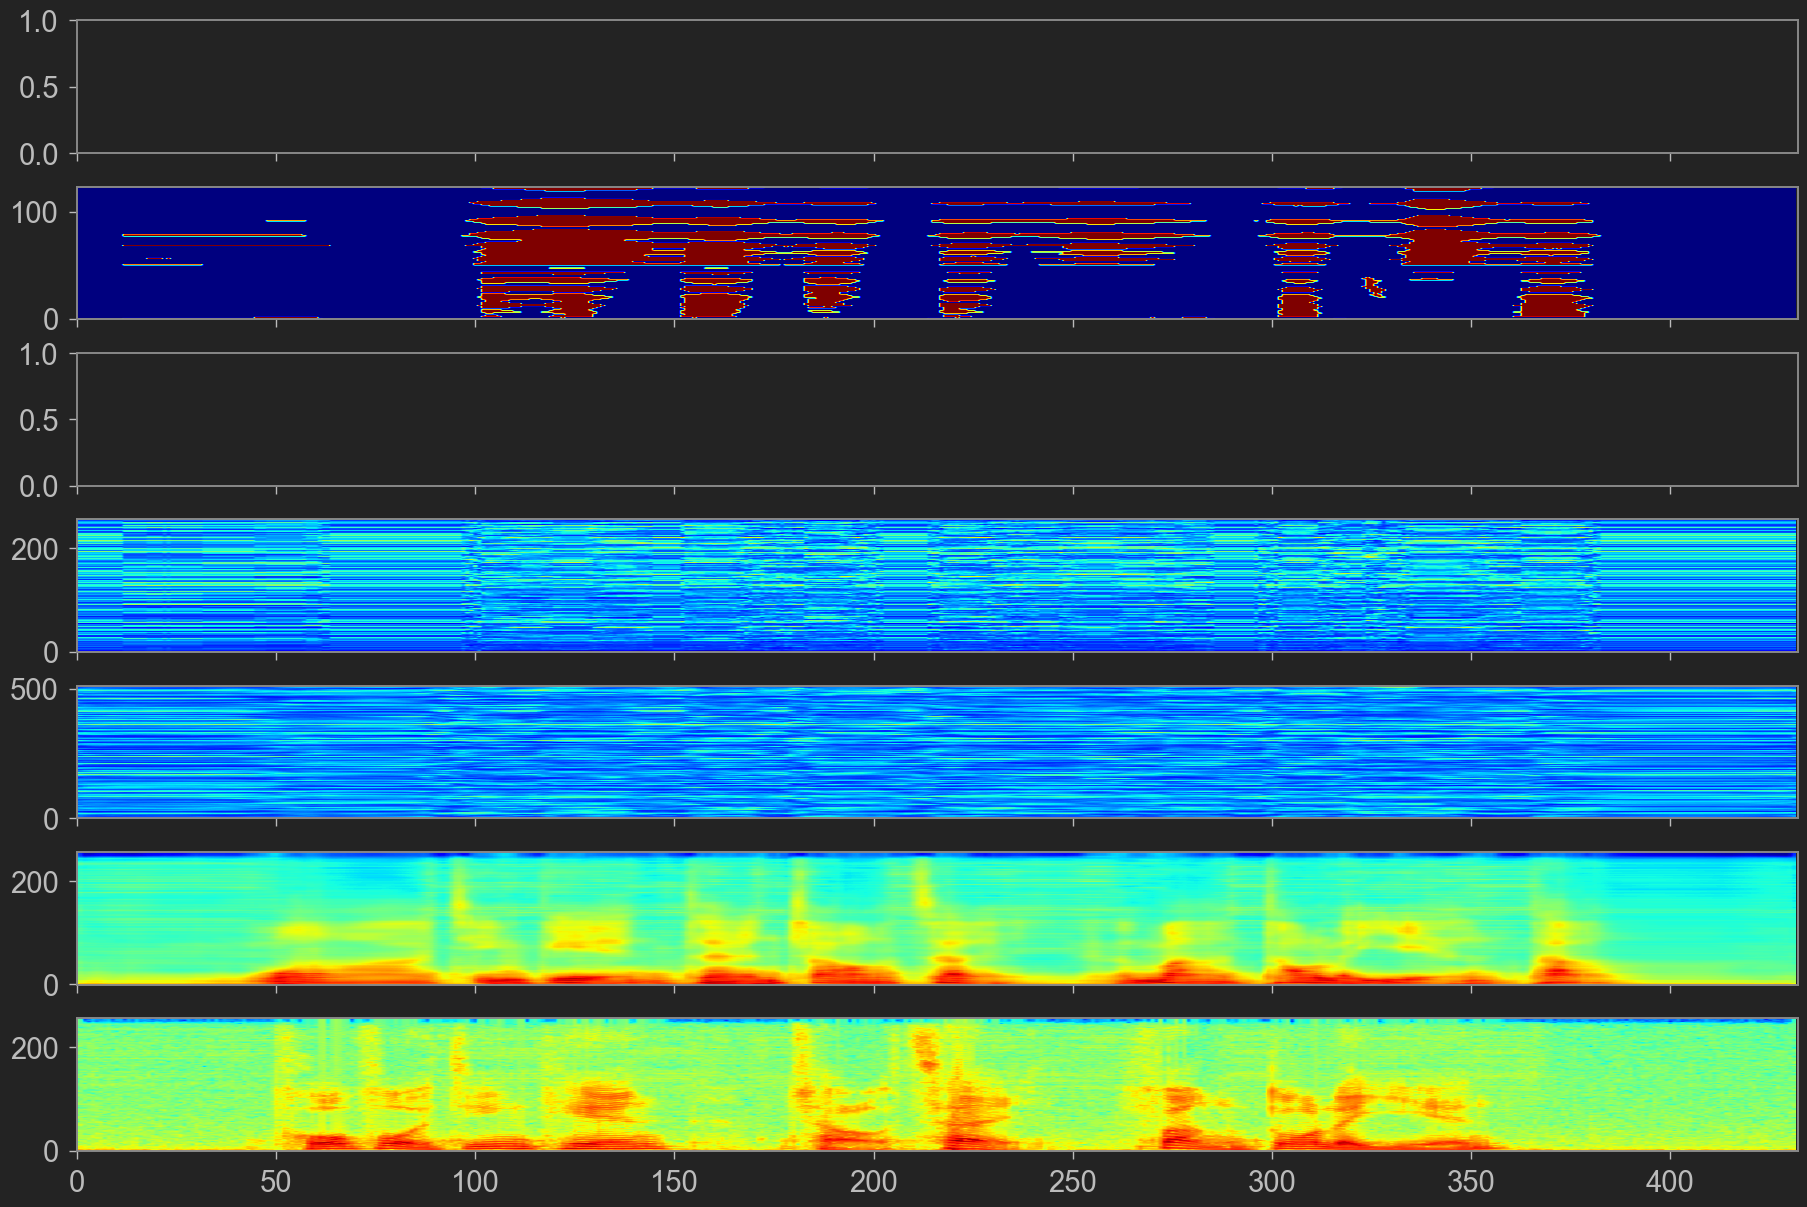

Model './checkpoint/MultiModal/S+E CNN512 PCA16_AE12 LF cat2 LSTM_Unfold_Linear (norm n100 fix).pt' loaded.
taiwan_3talker, n10dB, 63
PESQ:  0.9219933748245239
STOI:  0.43682893641145176
ESTOI: 0.08099452246899658


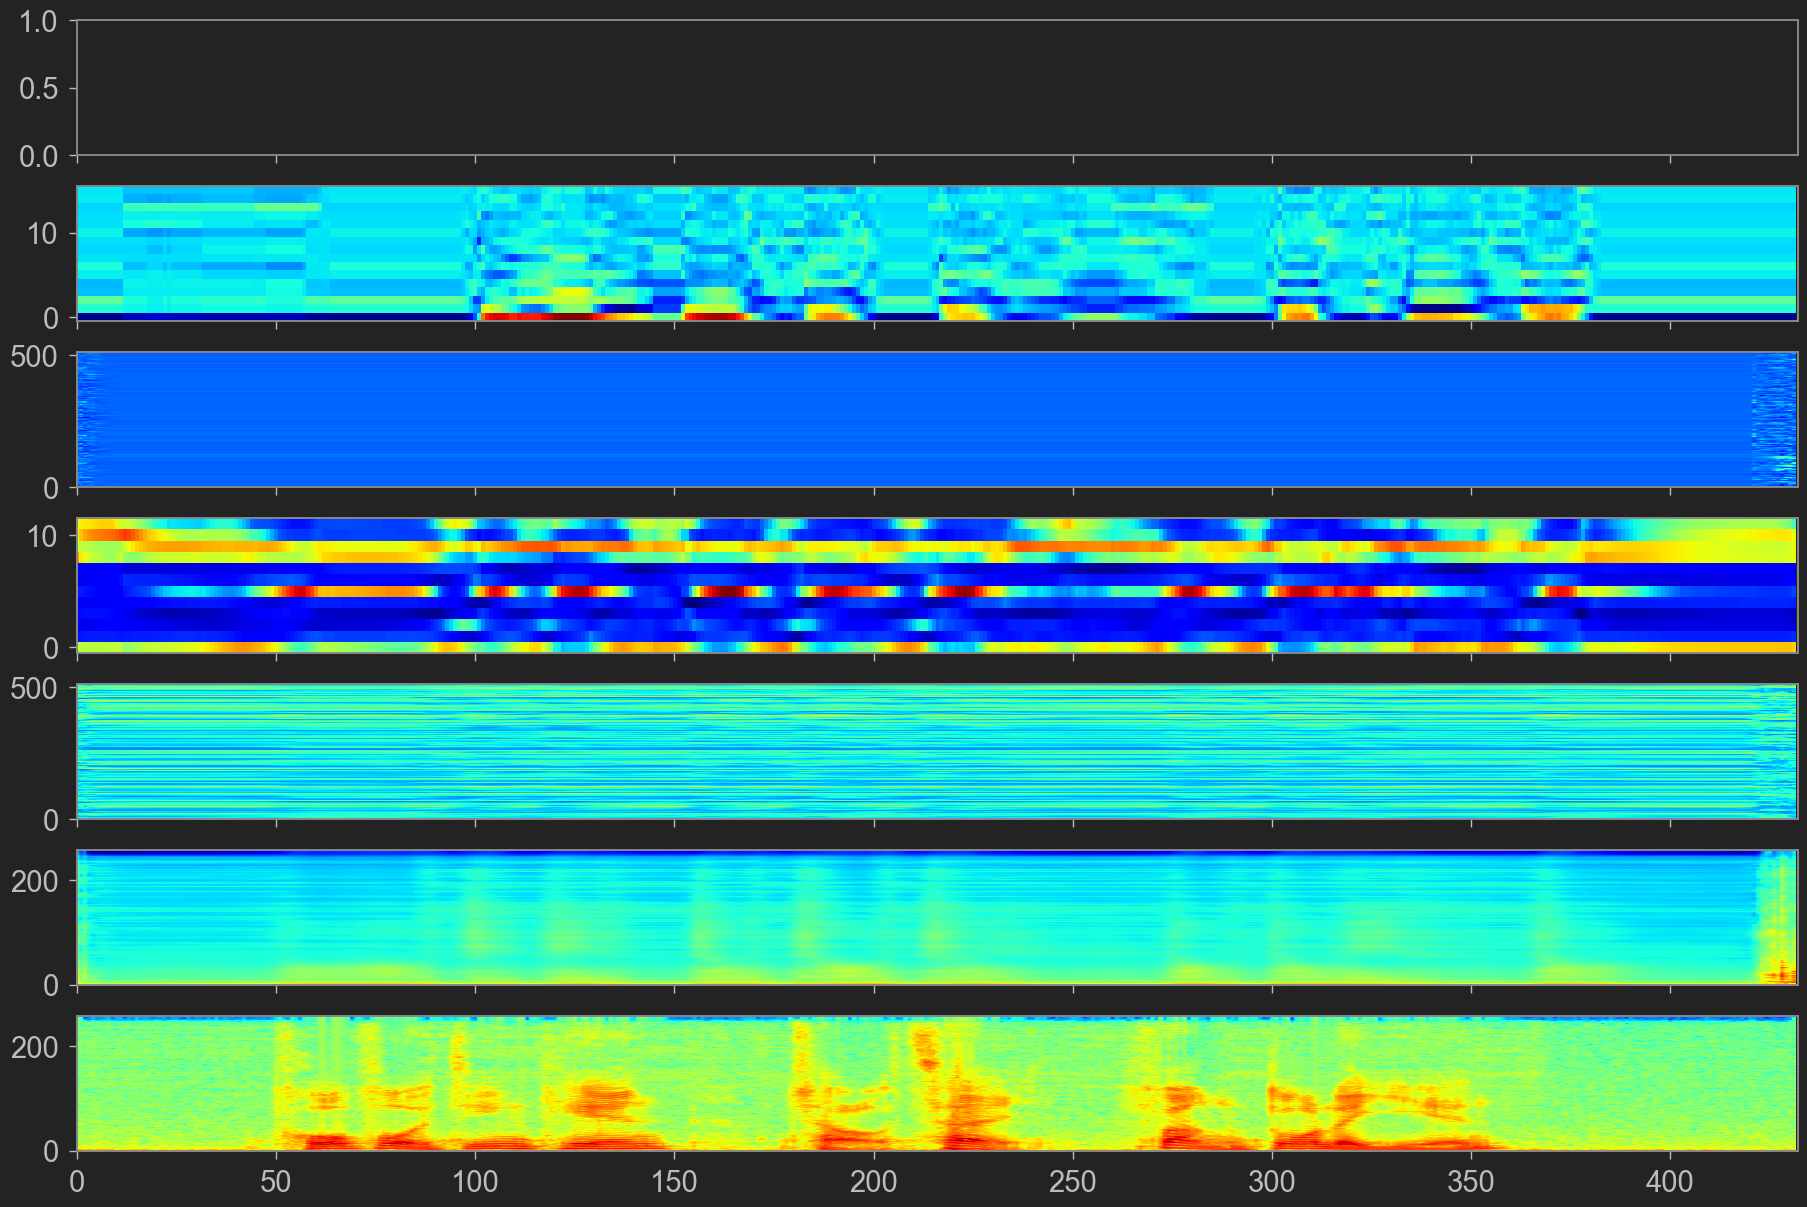

Model './checkpoint/MultiModal/S+E CNN512 PCA16_AE12 LF cat2 LSTM_Unfold_Linear (norm n100 fix) (zero_pad).pt' loaded.
taiwan_3talker, n10dB, 63
PESQ:  1.3723934888839722
STOI:  0.4873169614387683
ESTOI: 0.20514400632396235


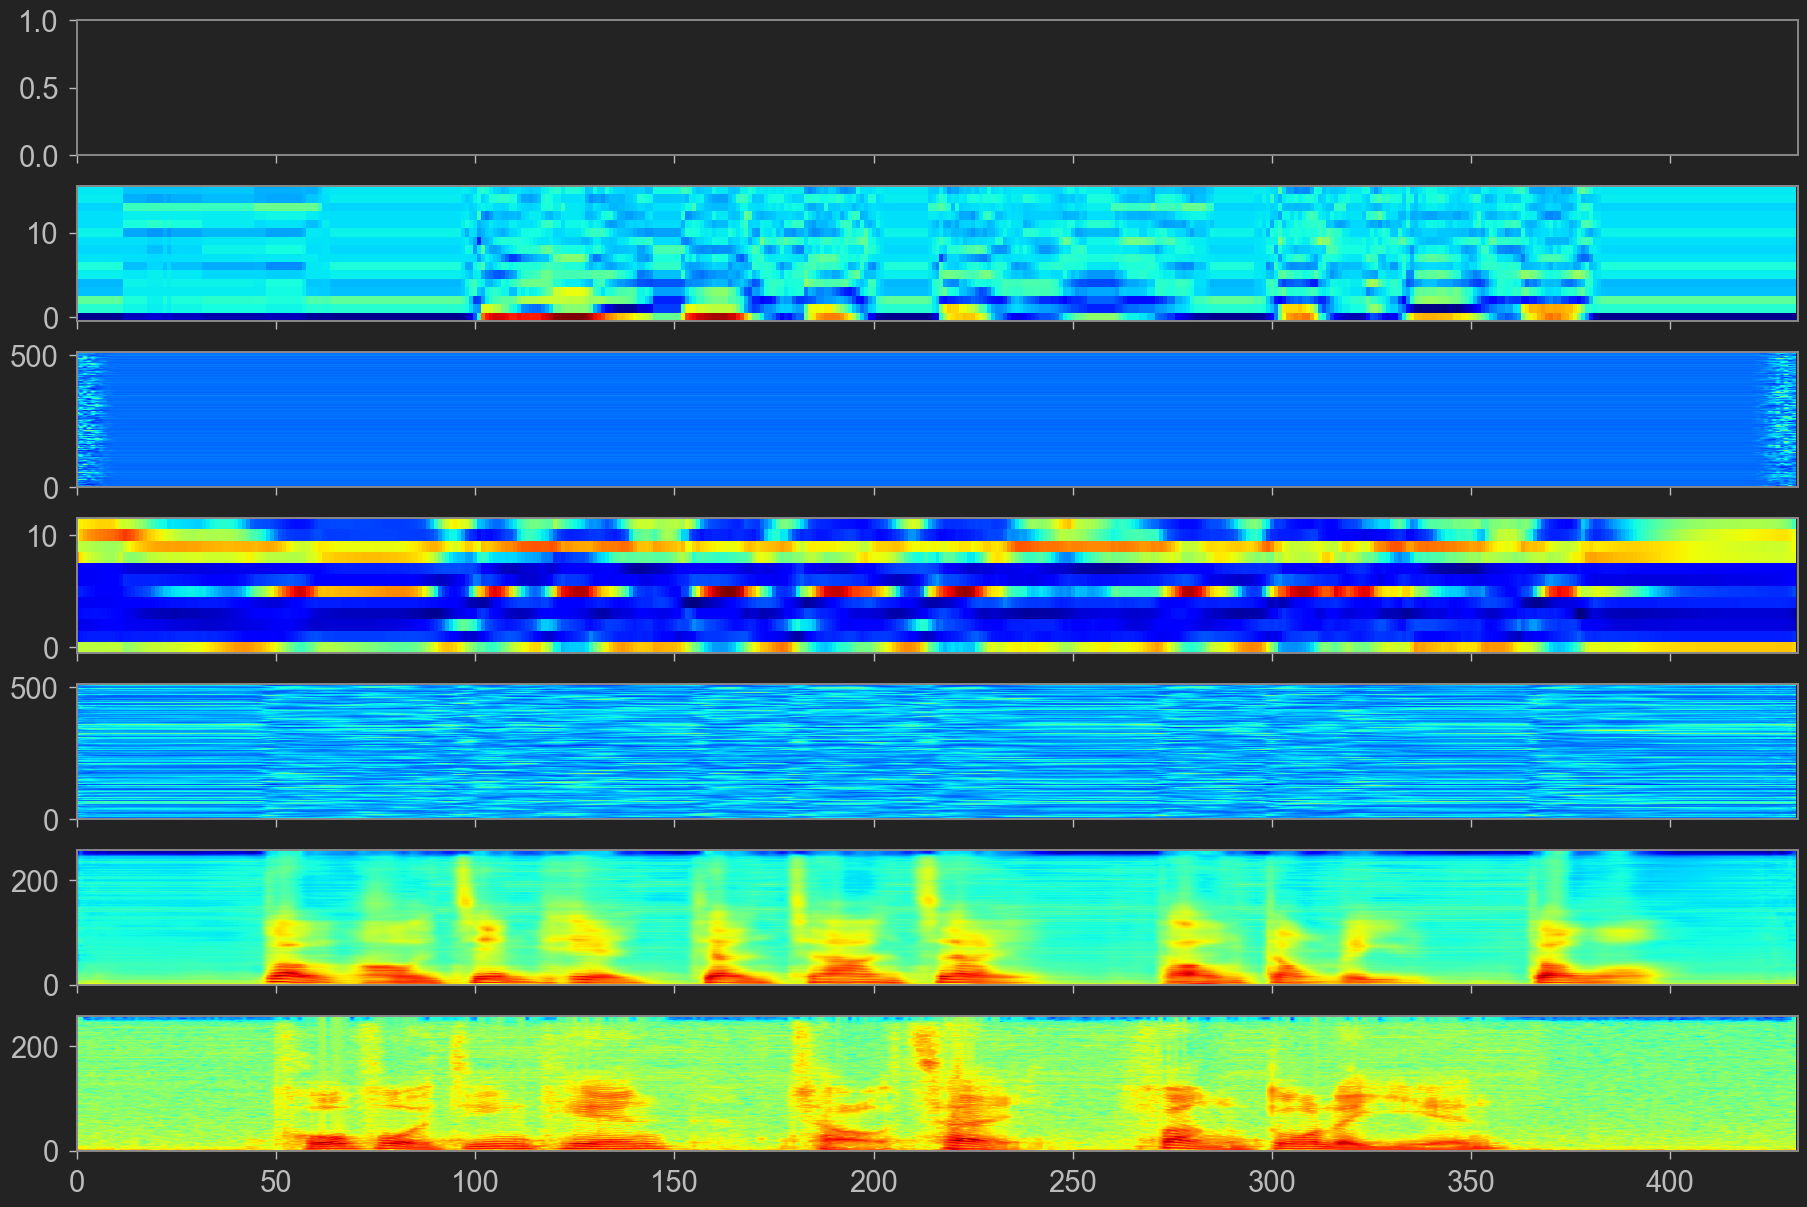

In [70]:
import re

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False, fscale=2, figsize=(8, 6))

from main import *
args.device = 'cuda:1'

if __name__ == '__main__':
    noise_type = -2
    SNR_type = 0
    sample = 63
    
    pca = pickle.load(open(os.path.join(args.AE_checkpoint_path, 'PCA16.pkl'), 'rb'))
    # ===== Load AutoEncoder =====
    AE_name = 'AE124_BiLSTM12NR S'
    AE, _, _ = AutoEncoder().load_model(
        os.path.join(args.AE_checkpoint_path, f'{AE_name}.pt'),
        device=args.device
    )
    
    AE_name = 'PCA_AE16_BiLSTM32_L12NR S'
    PCA_AE12, _, _ = AutoEncoder().load_model(
        os.path.join(args.AE_checkpoint_path, f'{AE_name}.pt'),
        device=args.device
    )
    
    AE_name = 'PCA_AE16_BiLSTM32_L6NR S'
    PCA_AE6, _, _ = AutoEncoder().load_model(
        os.path.join(args.AE_checkpoint_path, f'{AE_name}.pt'),
        device=args.device
    )
    
    model_names = [
#         'S LAVSE_CNN2048 (norm) (Epoch 40)',
#         'S LAVSE_CNN2048 (norm) V2',
#         'S+E LAVSE_CNN2048 EF cat1 LSTM_512_Linear (norm)',
#         'S+E LAVSE_CNN2048 AE12 EF cat2 LSTM_512_Linear (norm) V2',
#         'S+E LAVSE_CNN2048 AE12 LF cat2 LSTM_512_Linear (norm)',
#         'S+E LAVSE_CNN2048 LF mask LSTM_384_Linear (norm)',
        
        
#         'S LAVSE_CNN2048 (norm)',
#         'S+E LAVSE_CNN2048 EF cat0 LSTM_Unfold_Linear (norm)',
#         'S+E LAVSE_CNN2048 EF cat0 LSTM_Unfold_Linear (norm) V2',
#         'S+E LAVSE_CNN2048 PCA_AE6 LF cat1 LSTM_Unfold_Linear (norm)',
#         'S+E LAVSE_CNN2048 EF cat0 Unfold_LSTM_Linear (norm)',
#         'S+E LAVSE_CNN2048 PCA_AE6 LF cat1 Unfold_LSTM_Linear (norm)',
# =========================================================================
#         'S CNN512 LSTM_384_Linear (norm)',
#         'S CNN512 LSTM_384_Linear (norm n100)',
#         'S+E CNN512 EF cat0 Linear_384_Linear (norm)',
#         'S+E CNN512 EF cat2 Linear_384_Linear (norm)',
#         'S+E CNN512 EF cat0 LSTM_384_Linear (norm)',
#         'S+E CNN512 EF cat2 LSTM_384_Linear (norm)',
#         'S+E CNN512 AE12 LF cat2 LSTM_384_Linear (norm)',
#         'S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm)',
#         'S+E CNN512 EF cat0 LSTM_384_Linear (norm n100)',
        
        
#         'S+E CNN512 AE12 LF cat2 LSTM_384_Linear (norm)',
#         'S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm)',
#         'S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm n100)',
#         'S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm n100 fix)',
        'S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm n100 fix) (zero_pad) test',
#         'S+E ResidueCNN512 EF cat0 LSTM_384_Linear (norm)',
        
        
        'S+E CNN512 EF cat0 LSTM_Unfold_Linear (norm)',
#         'S+E CNN512 PCA_AE6 LF cat1 LSTM_Unfold_Linear (norm)',
#         'S+E CNN512 PCA_AE6 LF cat2 LSTM_Unfold_Linear (norm n100 fix)',
        'S+E CNN512 PCA16_AE12 LF cat2 LSTM_Unfold_Linear (norm n100 fix)',
        'S+E CNN512 PCA16_AE12 LF cat2 LSTM_Unfold_Linear (norm n100 fix) (zero_pad)',
    ]
    
    for model_name in model_names:
        print("===========================")
        model, e, v = MultiModal_SE().load_model(
            os.path.join(args.MM_checkpoint_path, f'{model_name}.pt'),
            args.device
        )
        
        if isinstance(model.E_Encoder, nn.Identity) and not isinstance(model.S_Encoder, nn.Identity):
            if 'PCA' in model_name:
                number = re.findall(r'\d+', model_name)
                if number[1] == '6':
                    model.E_Encoder = PCA_AE6.Encoder
                elif number[1] == '16' and number[2] == '12':
                    model.E_Encoder = PCA_AE12.Encoder
            else:
                model.E_Encoder = AE.Encoder
#         print(model, e, v)
        test(
            model, TEST_NOISE_TYPE[noise_type], TEST_SNR_TYPE[SNR_type], sample,
            pca=pca if 'PCA' in model_name else None,
            dataset_path=args.dataset_path,
            use_S=False,
#             use_E=False,
            display_audio=True,
#             show_graph=False
        )

In [71]:
import os
import pickle

from model import MultiModal_SE, AutoEncoder
from preprocess import cache_clean_data
from utils import analyze
from main import args

if __name__ == '__main__':
    # ===== Load AutoEncoder =====
#     AE_name = 'PCA_AE16_BiLSTM32_L12NR S'
    AE_name = 'PCA_AE16_BiLSTM32_L6NR S'
    AE, _, _ = AutoEncoder().load_model(
        os.path.join(args.AE_checkpoint_path, f'{AE_name}.pt'),
        device=args.device
    )
    
    # ===== Load clean data =====
    print('Cache clean testing data ...')
    pca = pickle.load(open(os.path.join(args.AE_checkpoint_path, 'PCA16.pkl'), 'rb'))
    dataset = cache_clean_data([pca, AE.Encoder], is_training=False, dataset_path=args.dataset_path, device=args.device)
#     dataset = cache_clean_data(is_training=False, dataset_path=args.dataset_path, device=args.device)
    print(f"Test set size: {len(dataset['Test'])}")
    
    # ===== Test set performance =====
#     model_name = 'S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm)'
#     model_name = 'S+E CNN512 EF cat0 LSTM_Unfold_Linear (norm)'
    model_name = 'S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm n100 fix) (zero_pad)'
    model, _, _ = MultiModal_SE().load_model(
        os.path.join(args.MM_checkpoint_path, f'{model_name}.pt'),
        device=args.device
    )
    
    analyze(
        model, dataset, model_name,# + ' (E only)',
        processes=8,
        use_S=True,
        use_griffin=False,
        evaluation_path=args.evaluation_path,
        dataset_path=args.dataset_path
    )

Model './checkpoint/AutoEncoder/PCA_AE16_BiLSTM32_L6NR S.pt' loaded.
Cache clean testing data ...
Test set size: 70
Model './checkpoint/MultiModal/S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm n100 fix) (zero_pad).pt' loaded.


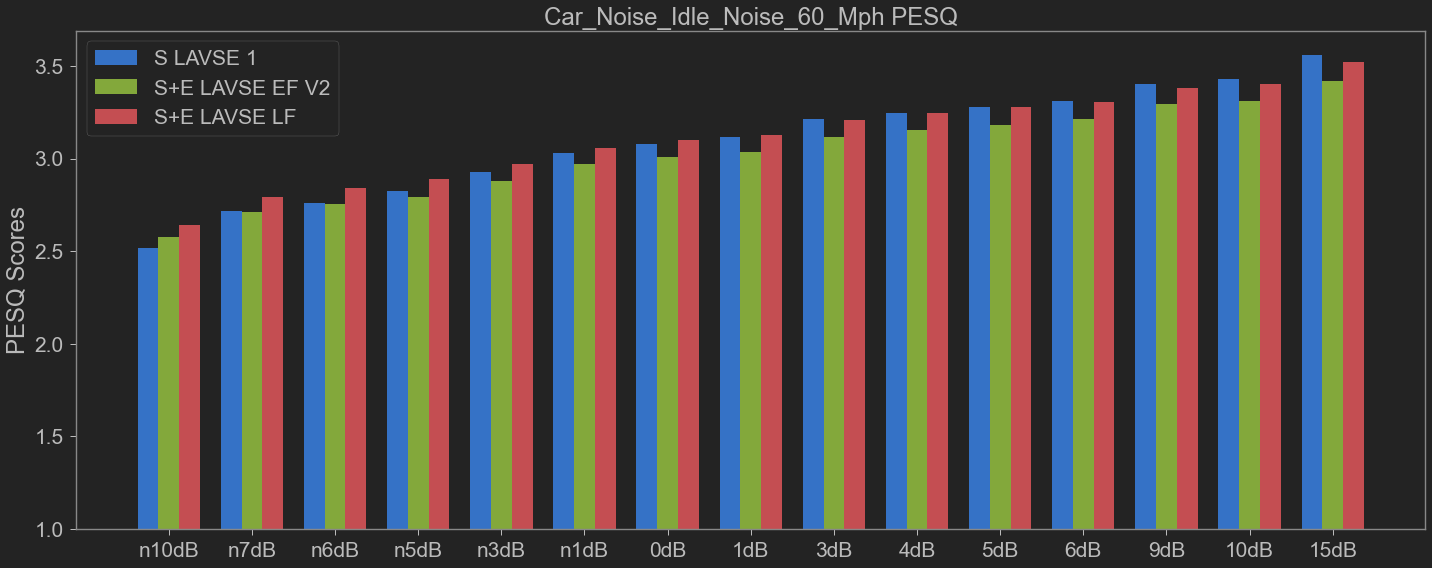

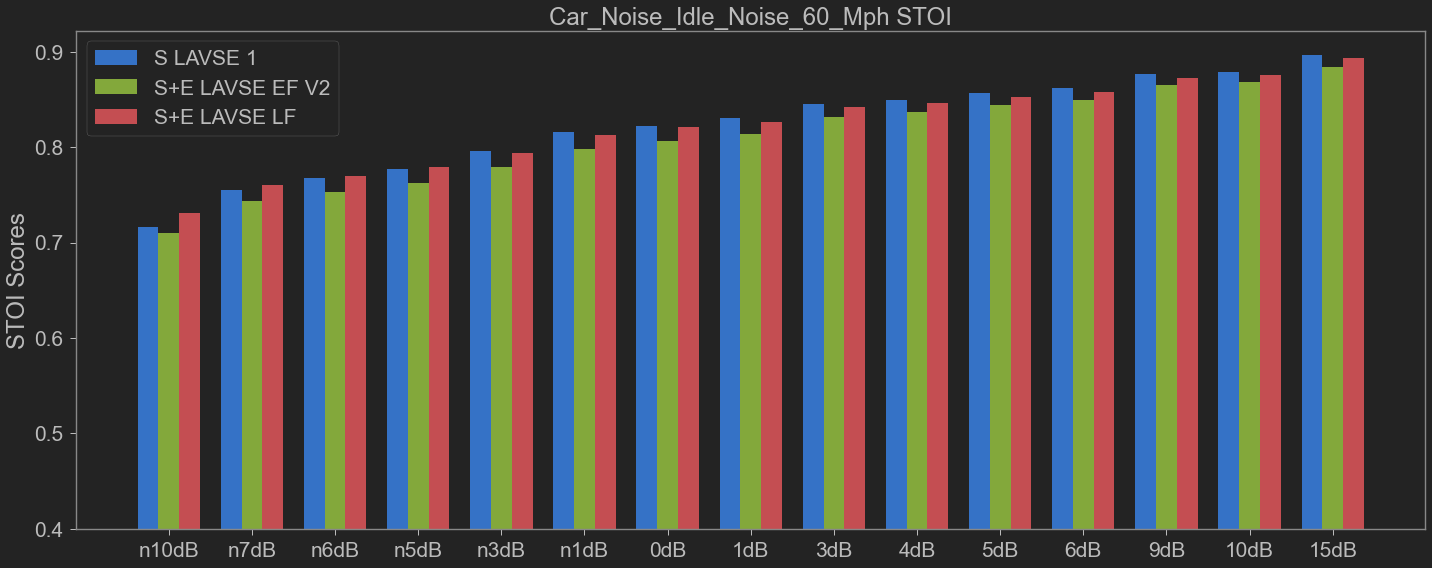

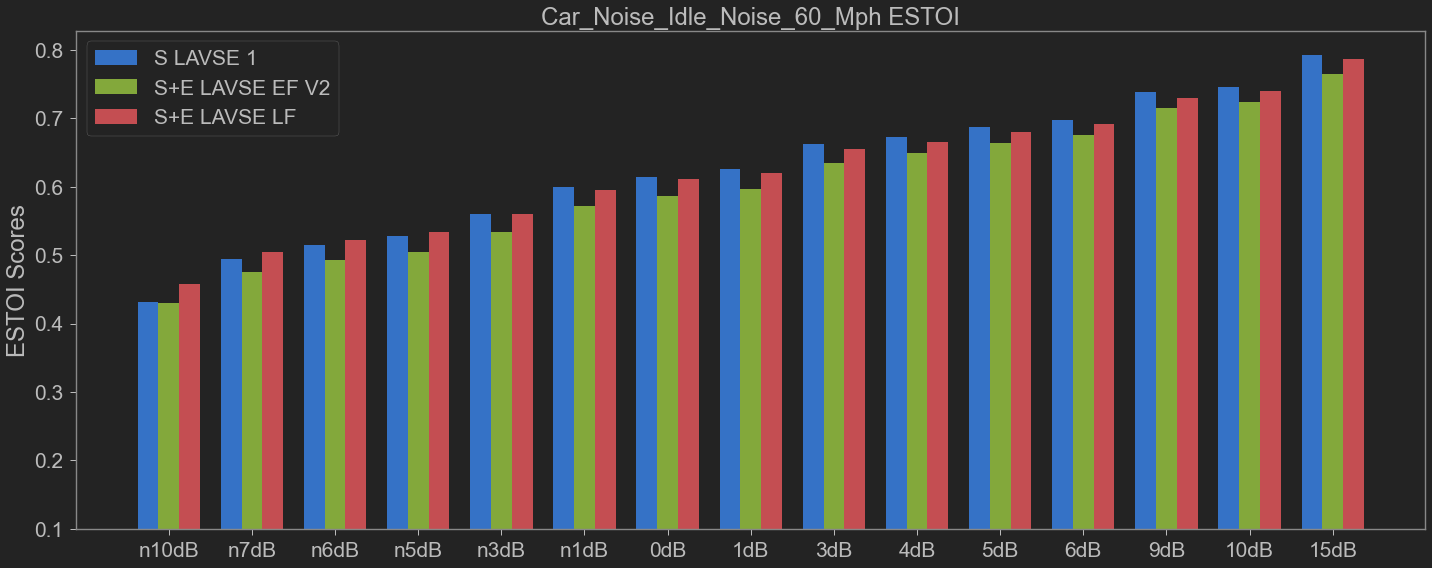

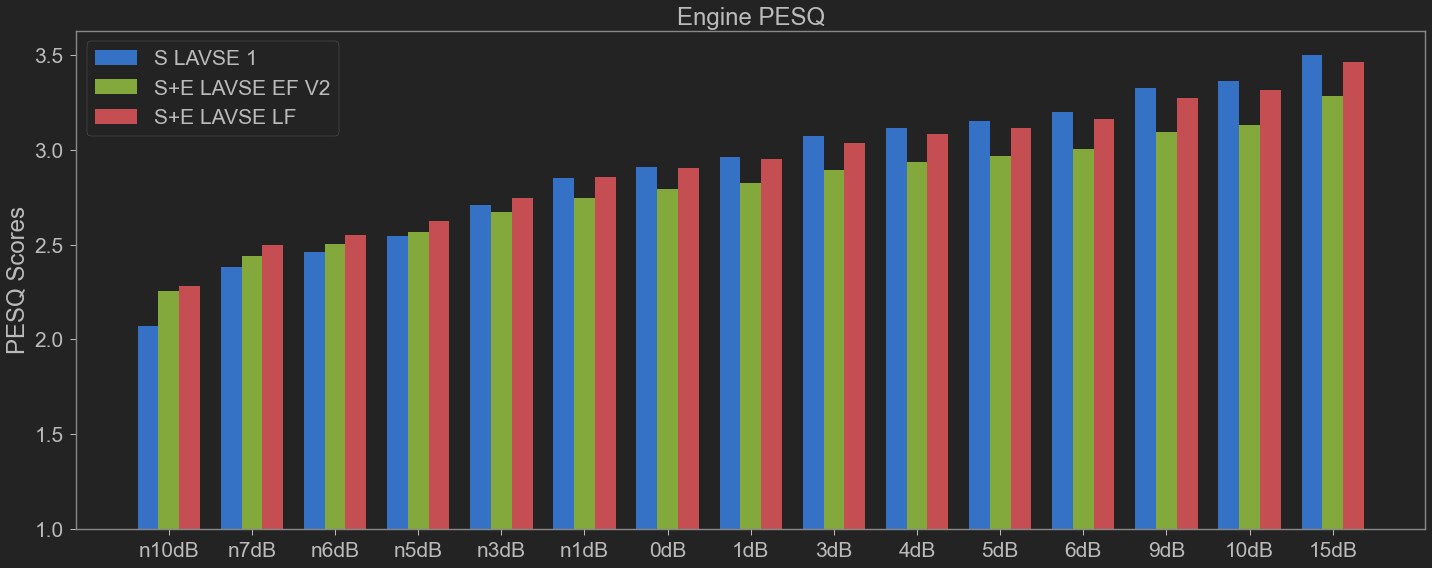

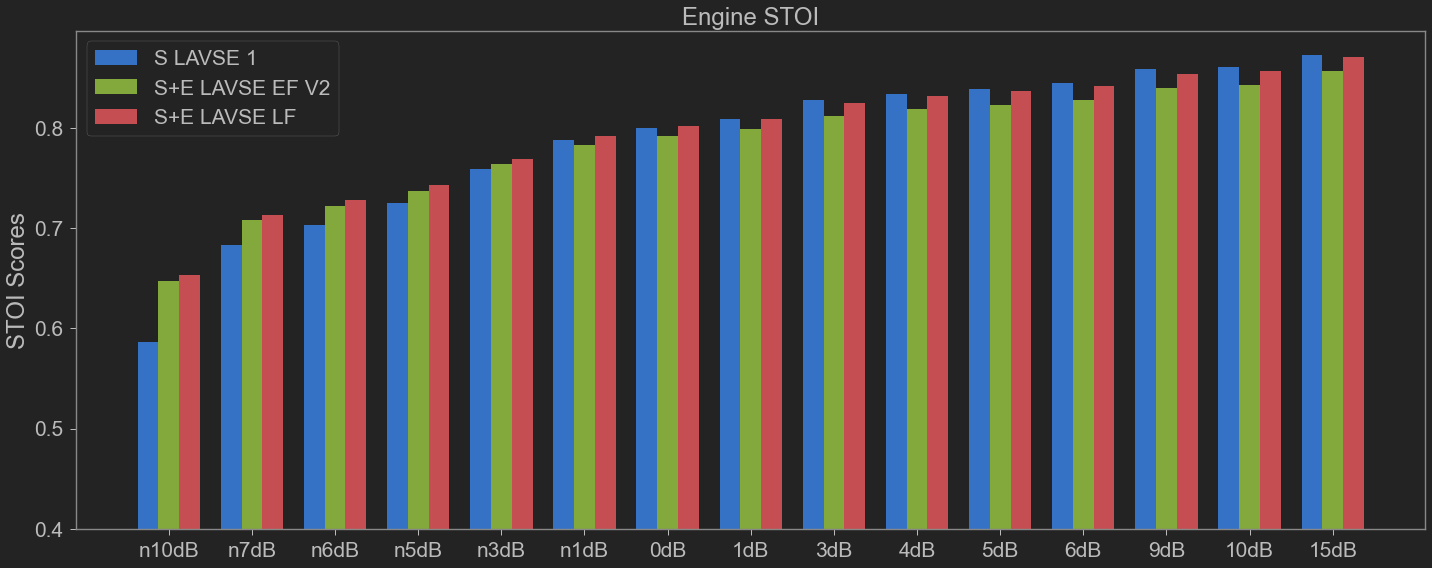

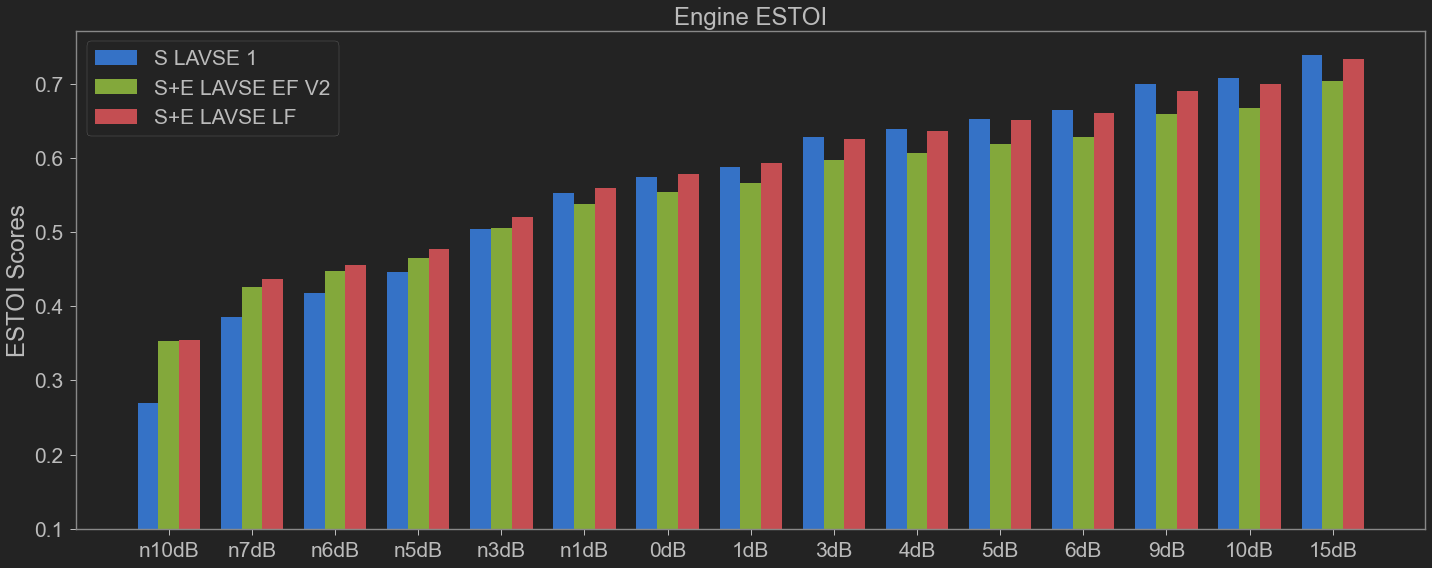

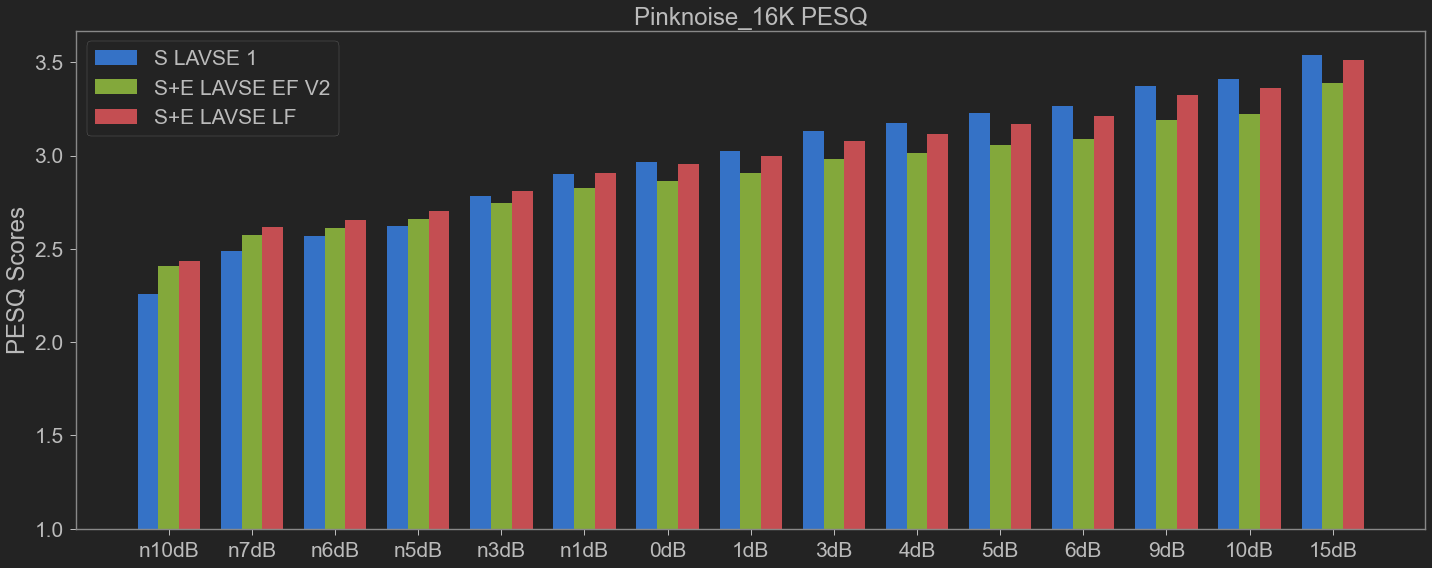

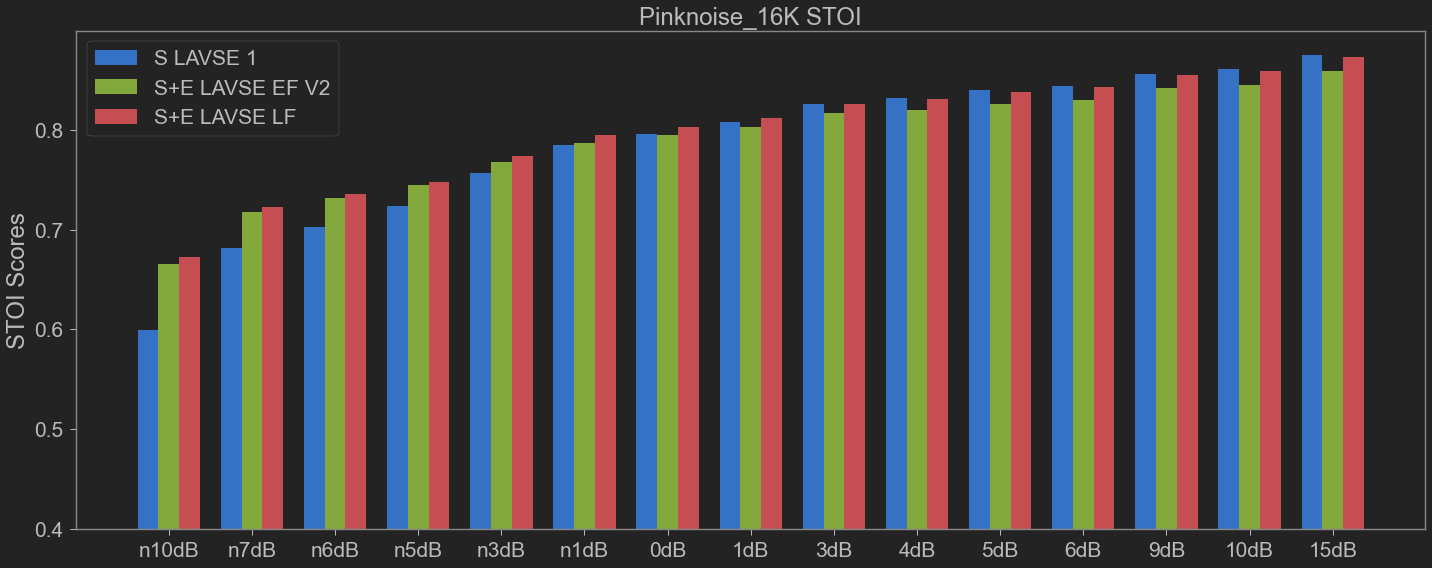

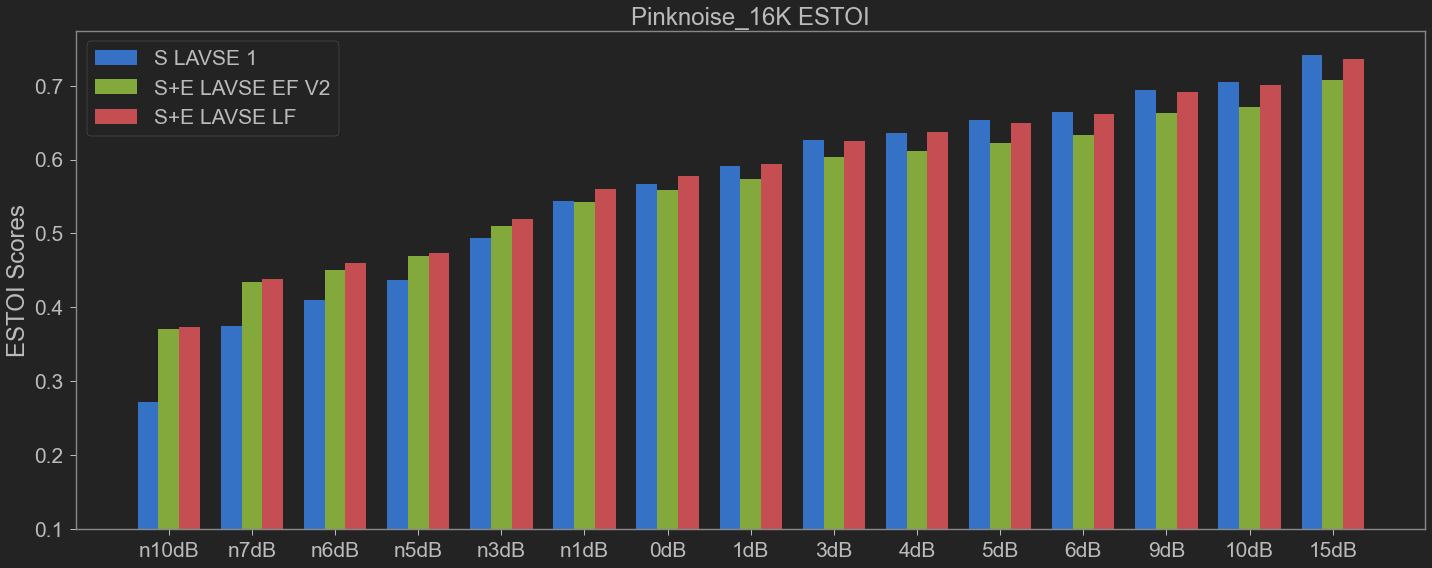

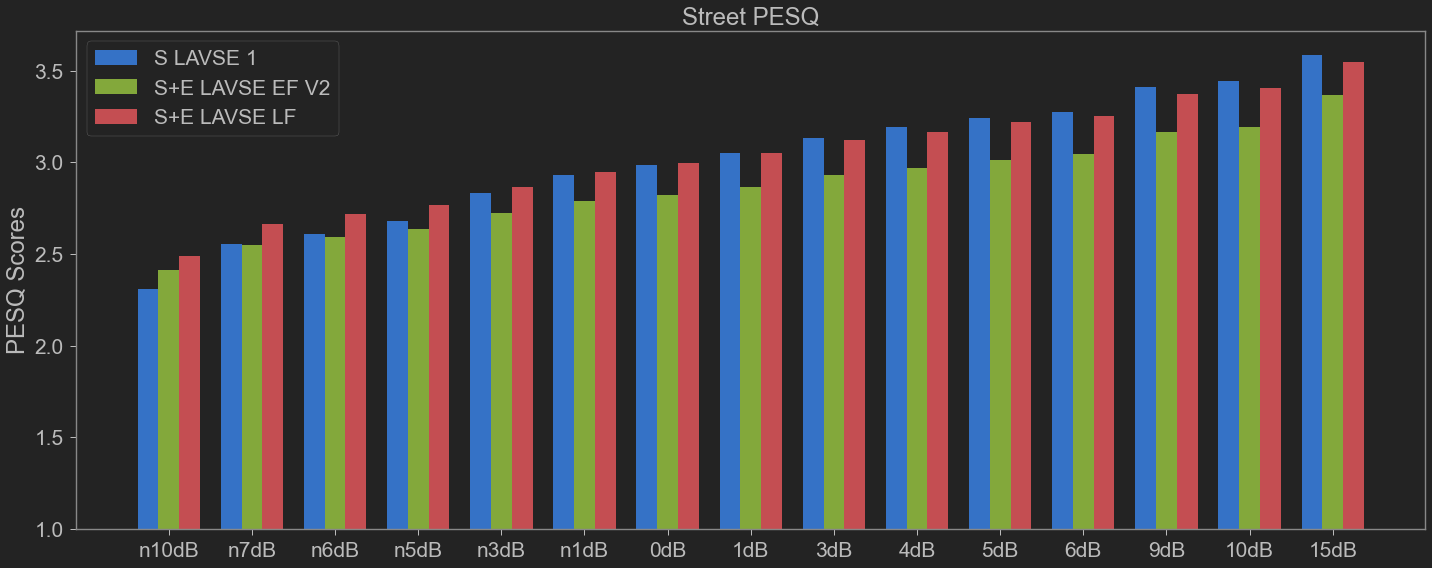

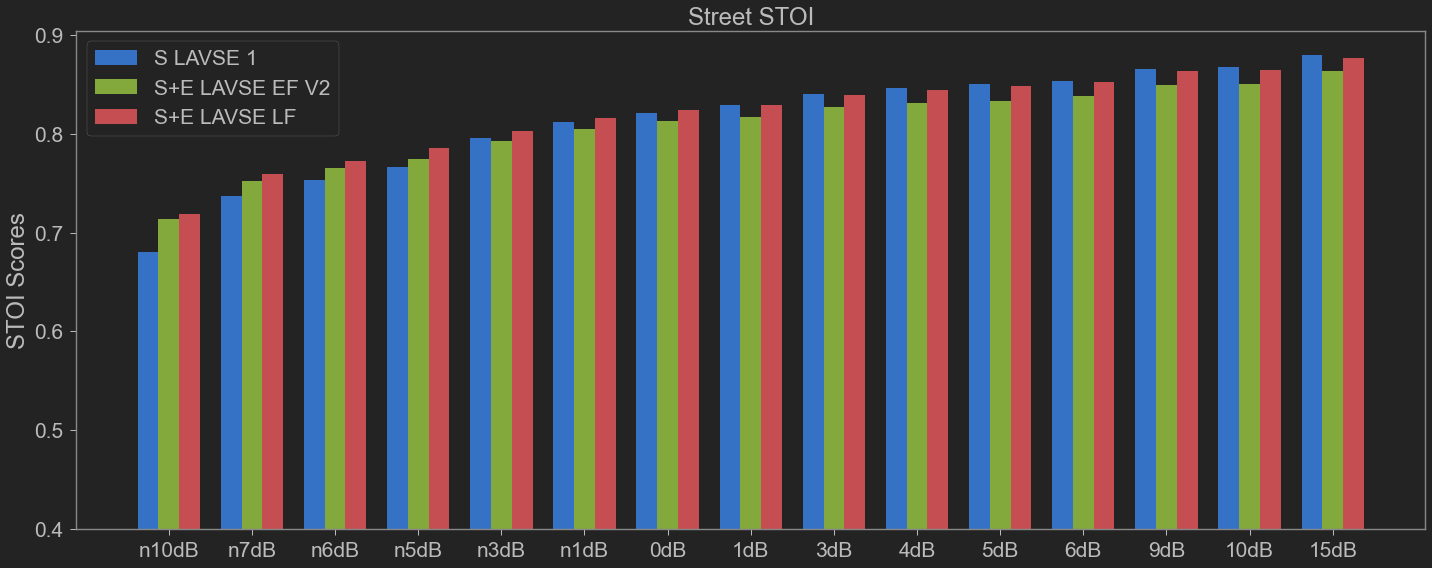

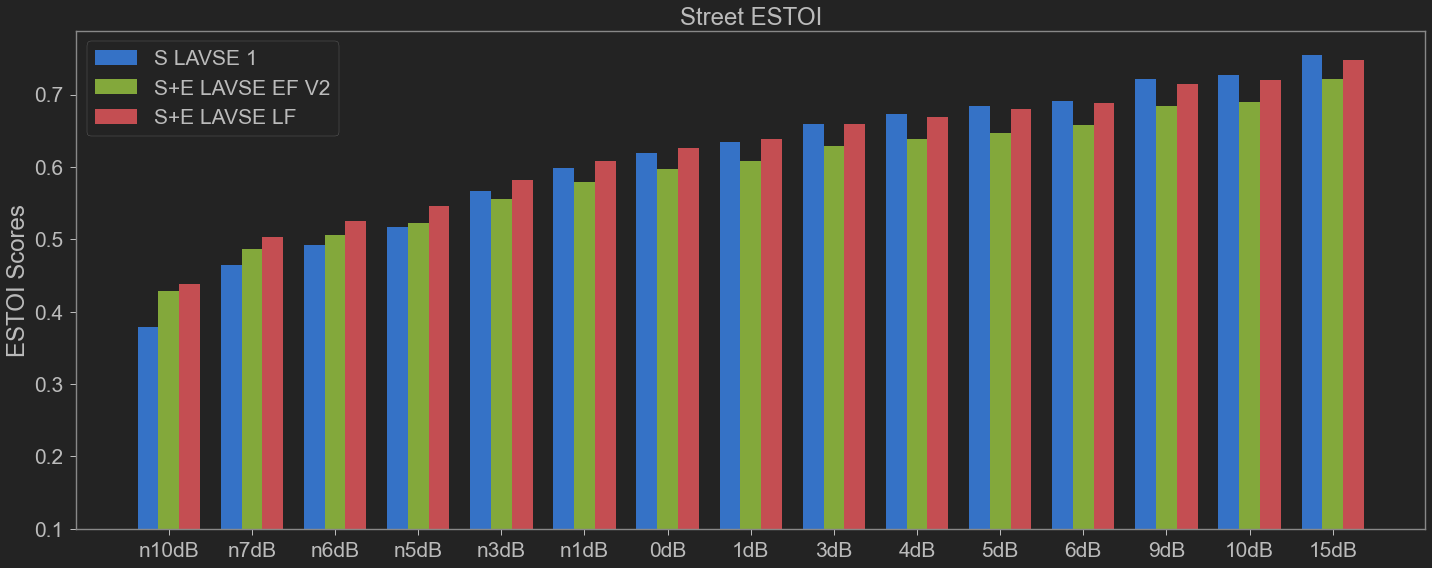

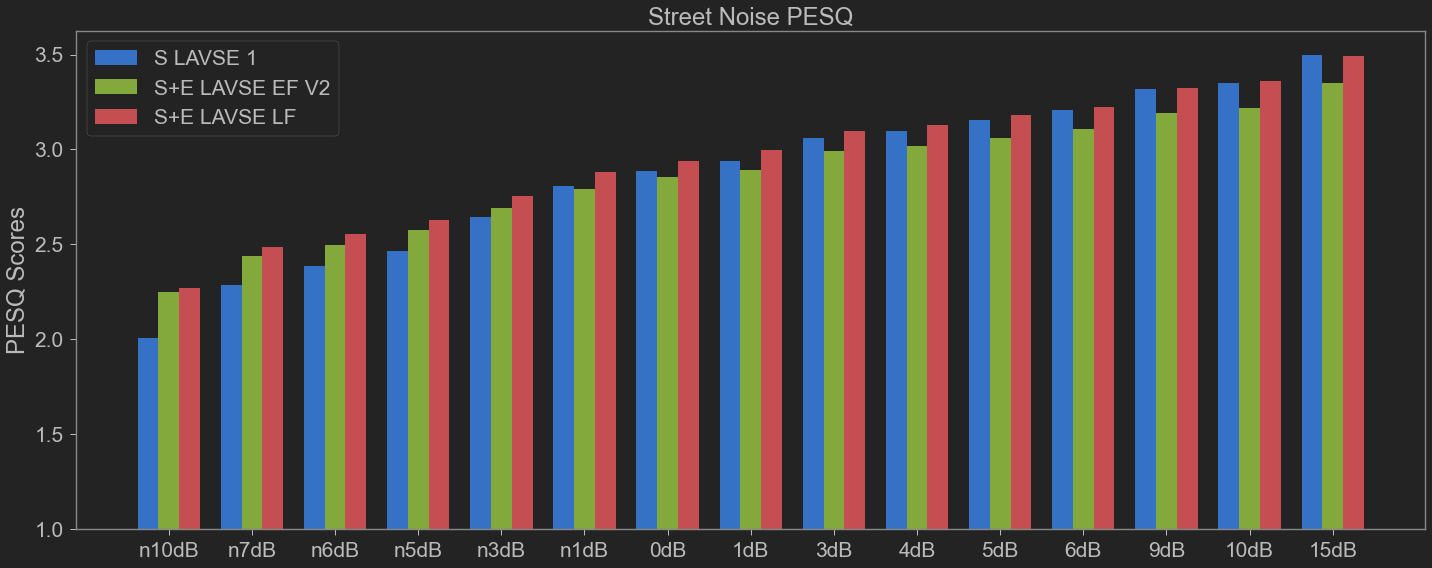

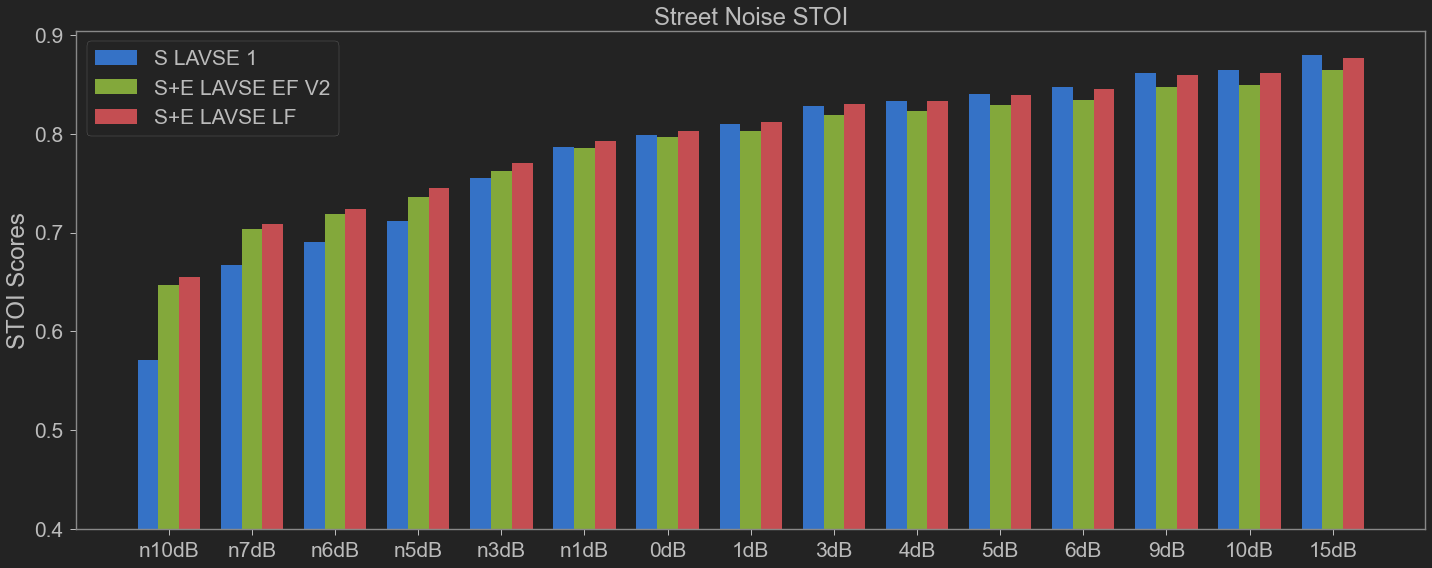

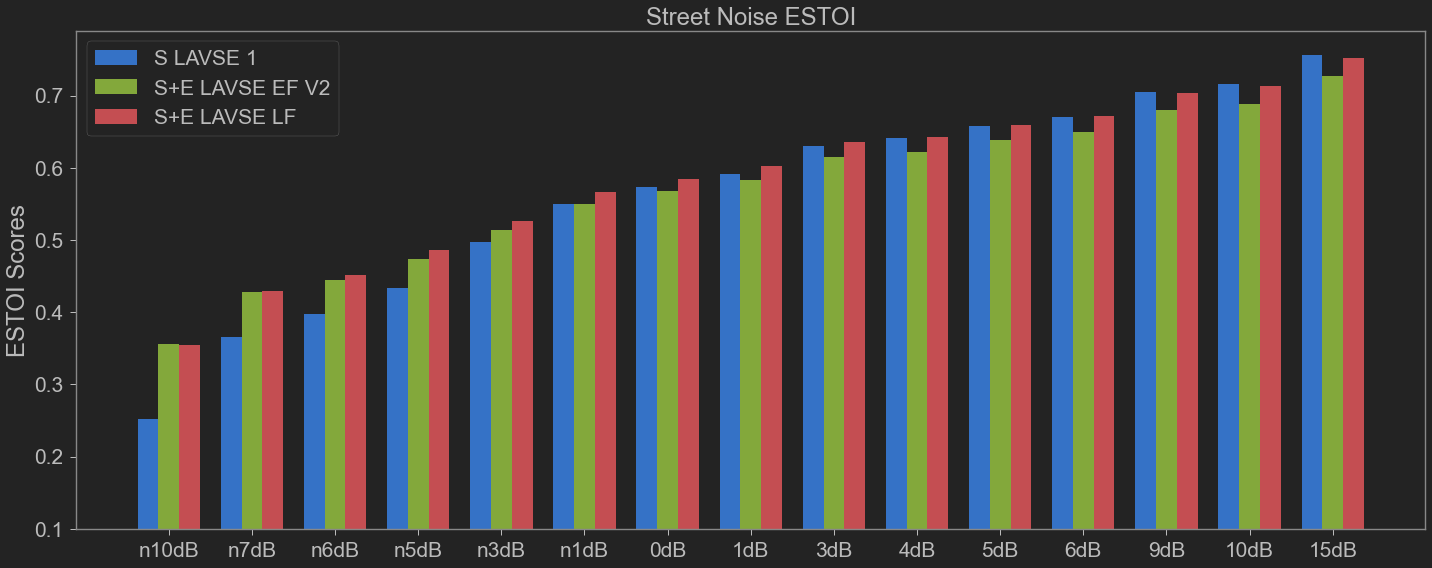

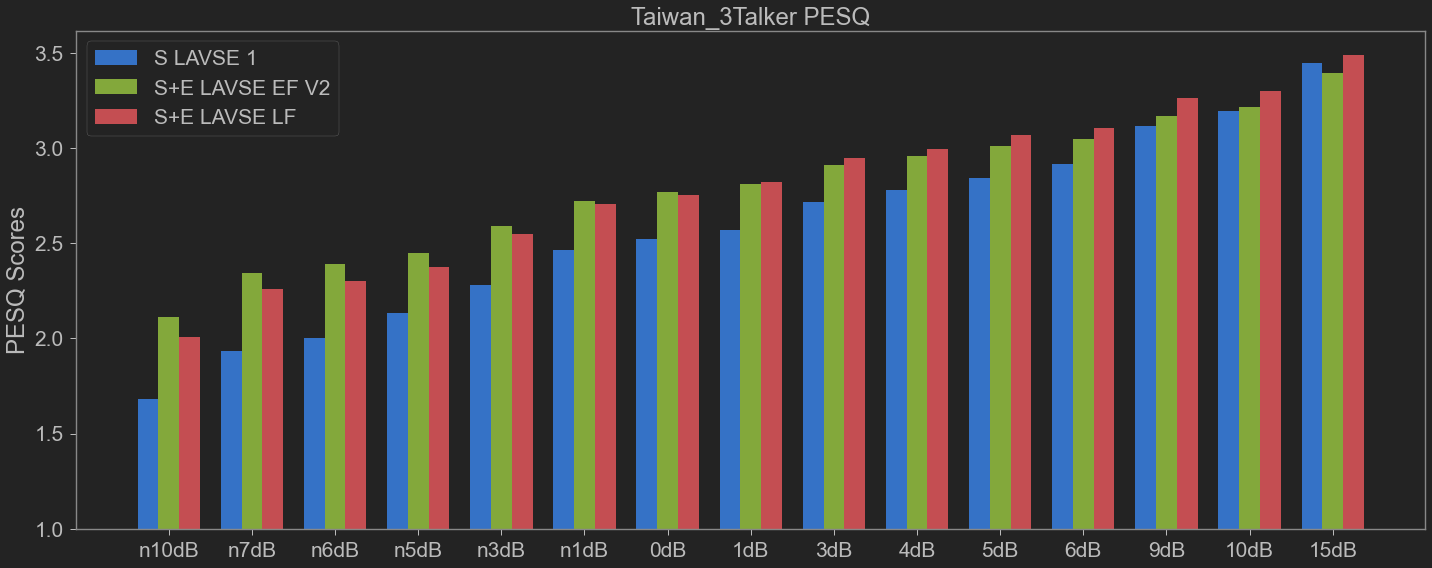

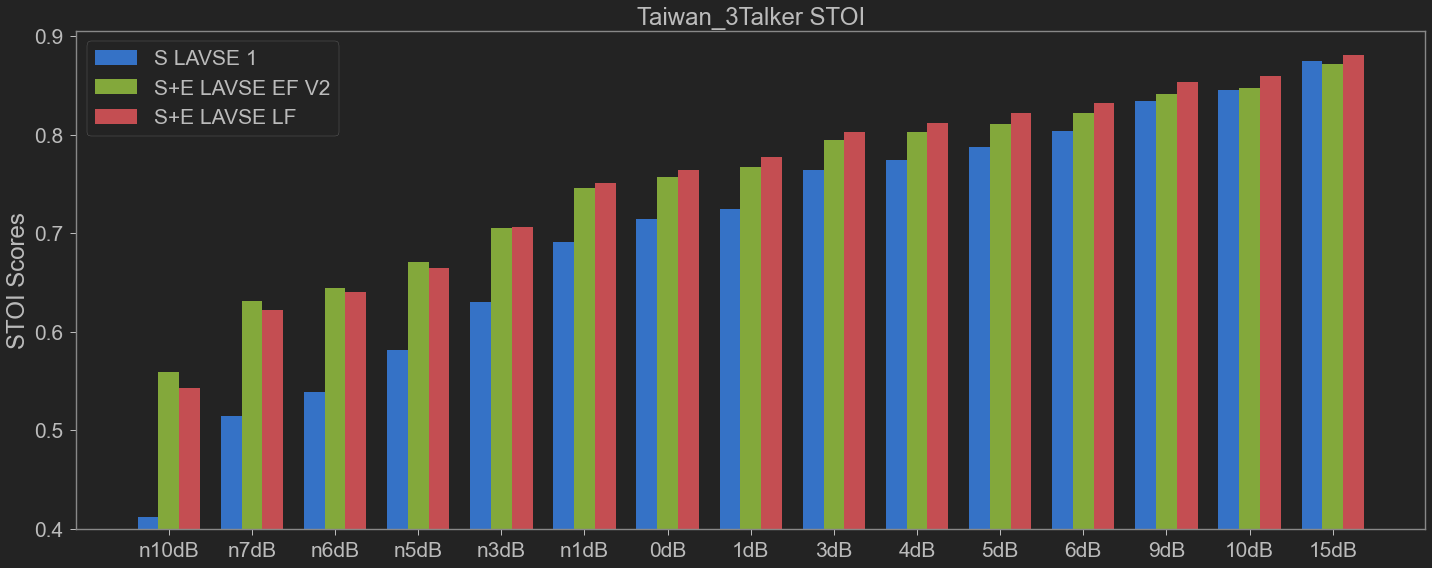

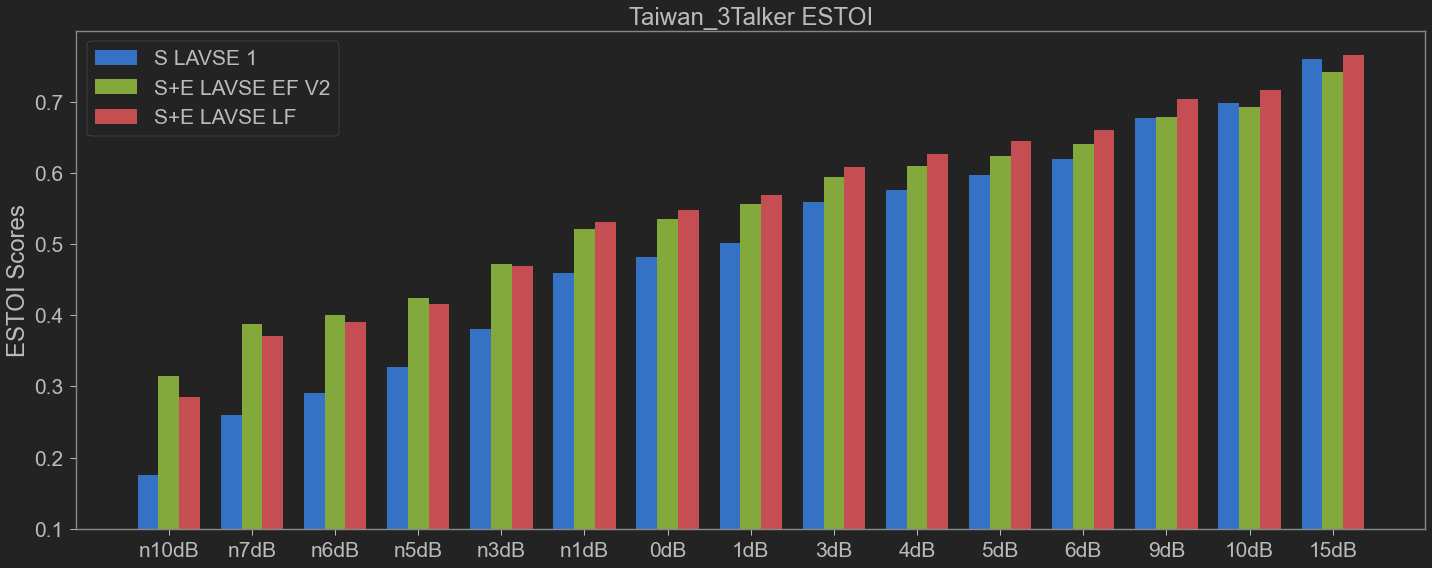

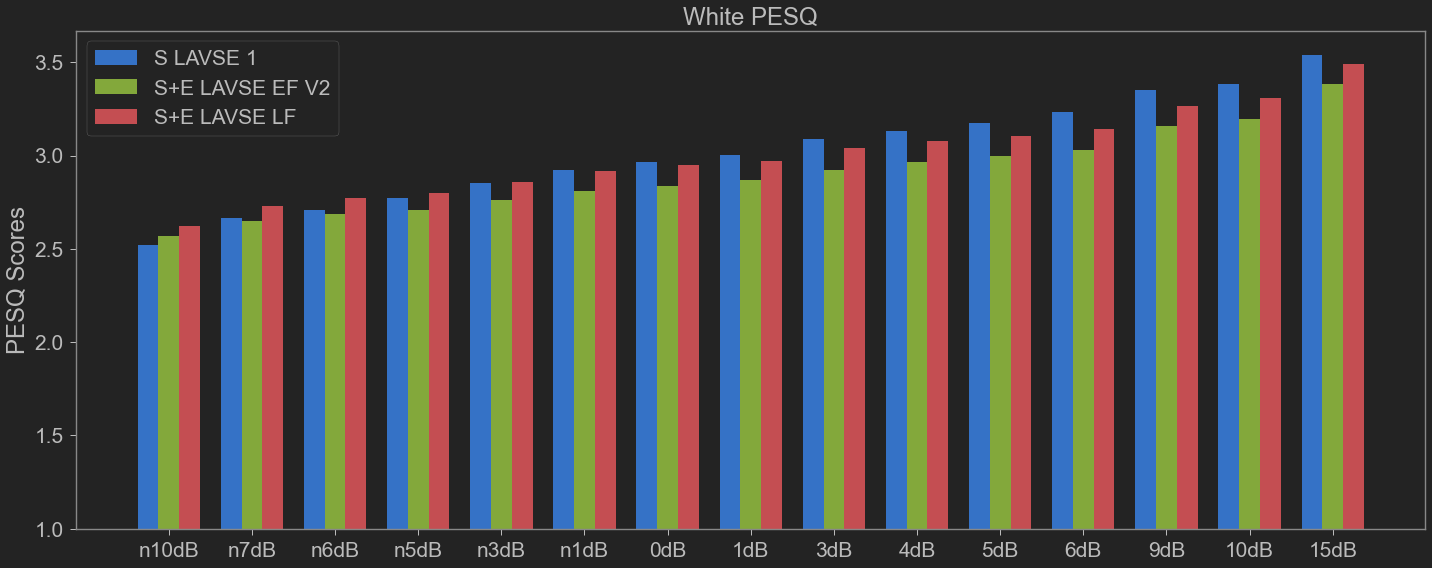

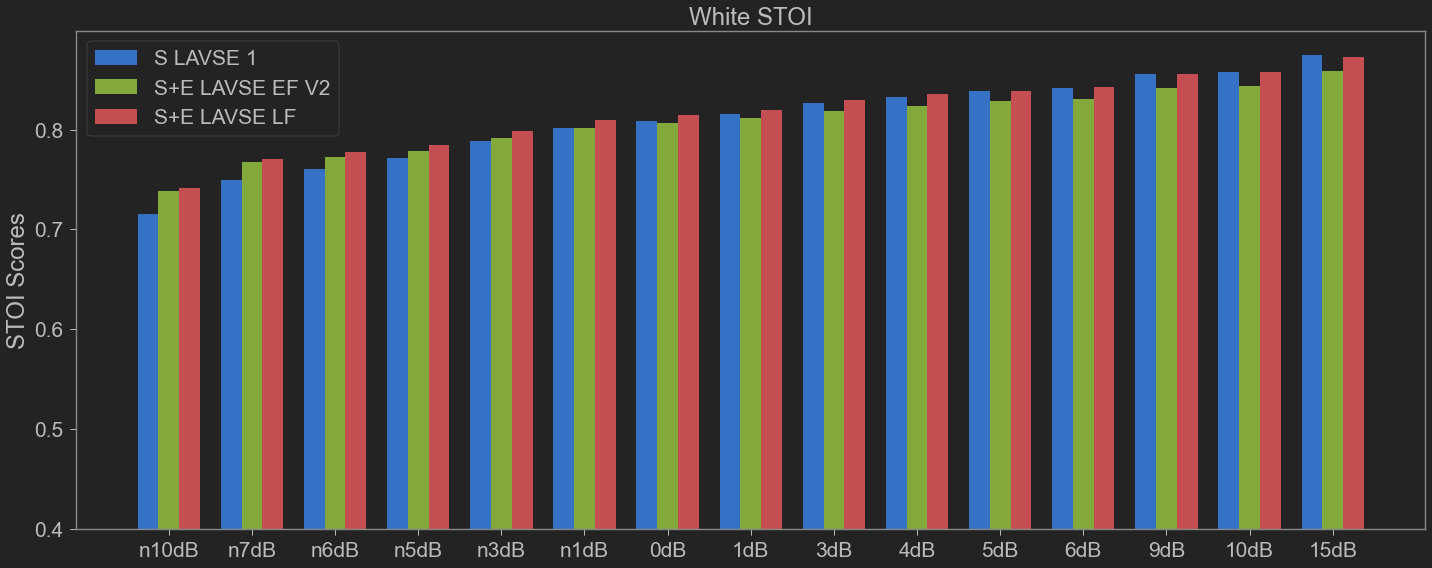

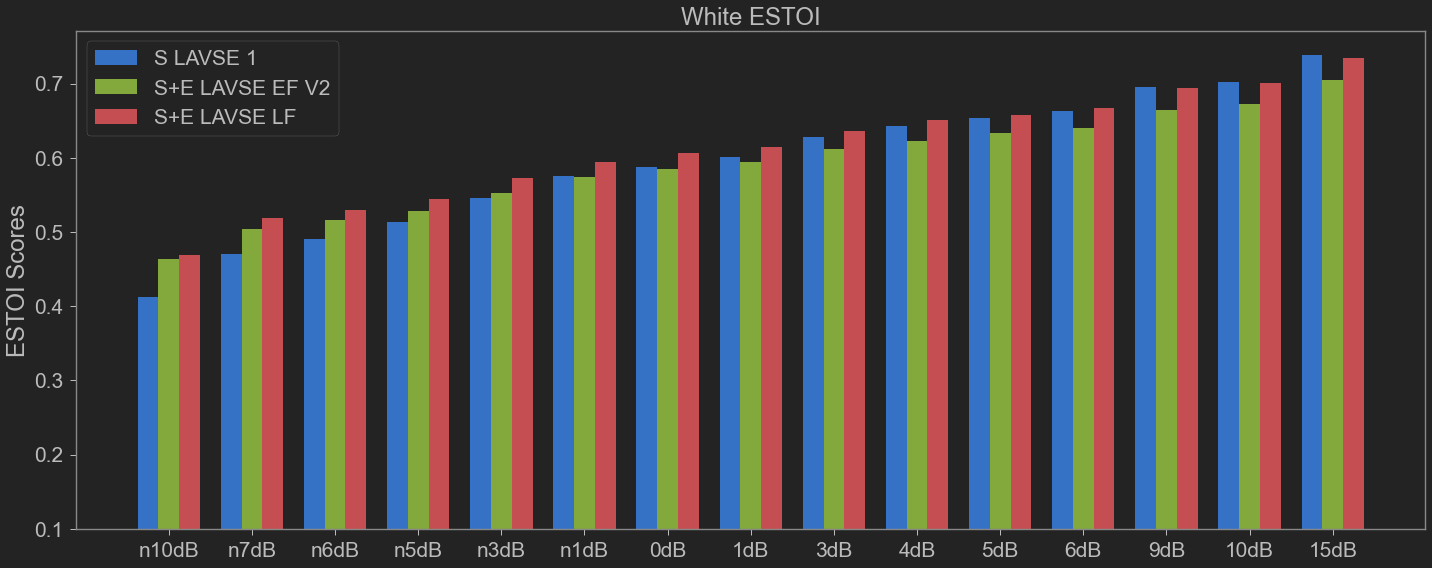

In [108]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False, fscale=2, figsize=(8, 6))

from utils import show_analyze
from main import args

if __name__ == '__main__':
    # ===== Show and Compare the Performance of Selected Models =====
    compare_dict = {
#         'Noisy':                       'Noisy',
#         'S':                           'S_CNN (Epoch 40)',
        
#         'S LAVSE':                     'S LAVSE_CNN2048 (norm) (Epoch 40)',
#         'S LAVSE V2':                  'S LAVSE_CNN2048 (norm) V2',
#         'S+E LAVSE cat1 EF':           'S+E LAVSE_CNN2048 EF cat1 LSTM_512_Linear (norm)',
#         'S+E LAVSE AE12 cat2 EF':      'S+E LAVSE_CNN2048 AE12 EF cat2 LSTM_512_Linear (norm) V2',
#         'S+E LAVSE AE12 LF':           'S+E LAVSE_CNN2048 AE12 LF cat2 LSTM_512_Linear (norm)',
#         'S+E LAVSE AE12 mask LF':      'S+E LAVSE_CNN2048 LF mask LSTM_384_Linear (norm)',
        
#         'S CNN512':                    'S CNN512 LSTM_384_Linear (norm)',
        'S CNN n100':                  'S CNN512 LSTM_384_Linear (norm n100)',
#         'S+E CNN cat0 EF':             'S+E CNN512 EF cat0 LSTM_384_Linear (norm)',
#         'S+E CNN cat0 EF n100':        'S+E CNN512 EF cat0 LSTM_384_Linear (norm n100)',
#         'S+E CNN512 cat2 EF':          'S+E CNN512 EF cat2 LSTM_384_Linear (norm)',
#         'S+E CNN512 cat1 EF Linear':   'S+E CNN512 EF cat0 Linear_384_Linear (norm)',
#         'S+E CNN512 cat2 EF Linear':   'S+E CNN512 EF cat2 Linear_384_Linear (norm)',
#         'S+E CNN512 AE12 cat2 LF':     'S+E CNN512 AE12 LF cat2 LSTM_384_Linear (norm)',
#         'S+E CNN512 PCA_AE6 LF':       'S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm)',
#         'S+E CNN512 EF':                'S+E CNN512 EF cat0 LSTM_Unfold_Linear (norm) test',
#         'S+E CNN512 PCA_AE12 LF LU':    'S+E CNN512 PCA_AE6 LF cat1 LSTM_Unfold_Linear (norm)',
#         'S+E CNN512 EF U':              'S+E CNN512 EF cat0 Unfold_LSTM_Linear (norm)',
#         'S+E CNN512 PCA_AE12 LF U':     'S+E CNN512 PCA_AE6 LF cat1 Unfold_LSTM_Linear (norm)',
        
#         'S+E ResCNN512 cat1 EF':       'S+E ResidueCNN512 EF cat0 LSTM_384_Linear (norm)',
        
        'S LAVSE 1':                    'S LAVSE_CNN2048 (norm)',
#         'S+E LAVSE EF':                 'S+E LAVSE_CNN2048 EF cat0 LSTM_Unfold_Linear (norm)',
        'S+E LAVSE EF V2':              'S+E LAVSE_CNN2048 EF cat0 LSTM_Unfold_Linear (norm) V2',
        'S+E LAVSE LF':                 'S+E LAVSE_CNN2048 PCA_AE6 LF cat1 LSTM_Unfold_Linear (norm)',
#         'S+E LAVSE EF U':               'S+E LAVSE_CNN2048 EF cat0 Unfold_LSTM_Linear (norm)',
#         'S+E LAVSE LF U':               'S+E LAVSE_CNN2048 PCA_AE6 LF cat1 Unfold_LSTM_Linear (norm)',
        
#         'S+E CNN512 cat1 EF':           'S+E CNN512 EF cat0 LSTM_384_Linear (norm)',
    }

    show_analyze(
        compare_dict=compare_dict,
        evaluation_path=args.evaluation_path,
#         metrics=['STOI', 'ESTOI'],
#         test_SNR_type=['n10dB', 'n5dB', '0dB', '5dB', '10dB'],
        figsize=(20, 8),
        show='graph',
#         use_label=True,
#         save_dir='Test'
    )

['n10dB', 'n5dB', '0dB', '5dB']
====
PESQ:
	Noisy :	[1.82952321 2.08317438 2.30932883 2.54737581]	2.1923505595752175
	EASE$_{A}$ :	[2.25634607 2.64604864 2.95820355 3.20577938]	2.766594409942627
	EASE$_{LF}$ :	[2.35207849 2.6920026  2.96039502 3.16826511]	2.7931853047439033
	EASE$_{LF}0$ :	[2.38573296 2.71650396 2.9755556  3.17220745]	2.812499990420682
	EASE$_{EF}$ :	[2.48642945 2.77650701 3.01846729 3.21634202]	2.8744364419153756
====
STOI:
	Noisy :	[0.50939562 0.59409878 0.68415968 0.76808037]	0.6389336119726058
	EASE$_{A}$ :	[0.6523999  0.74979043 0.80881751 0.84553148]	0.7641348311196021
	EASE$_{LF}$ :	[0.67310495 0.75648875 0.80794478 0.843037  ]	0.7701438713310981
	EASE$_{LF}0$ :	[0.67719117 0.75948444 0.81071937 0.84444611]	0.7729602722023804
	EASE$_{EF}$ :	[0.70219466 0.76967481 0.81550599 0.84590959]	0.7833212646457386
====
ESTOI:
	Noisy :	[0.17682791 0.26270155 0.36910395 0.49337301]	0.32550160569639375
	EASE$_{A}$ :	[0.34653497 0.48159325 0.58780904 0.66678447]	0.52068043181

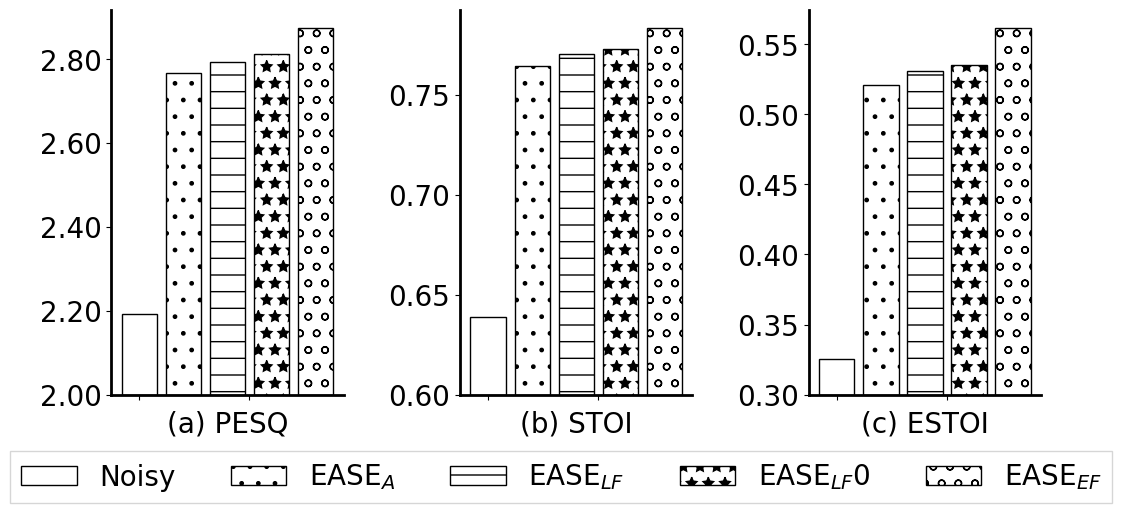

In [69]:
if 'jtplot' in vars():
    jtplot.reset()

from main import *
import matplotlib.pyplot as plt

if __name__ == '__main__':
    plt.rcParams.update({
        'font.size': 20,
        'axes.linewidth': 2,
        'legend.shadow':False,
        'legend.fancybox':False,
    })
    
    compare_dict = {
        'Noisy':        'Noisy',
#         'LAVSE$_{A}$':  'S LAVSE_CNN2048 (norm)',
#         'LAVSE$_{LF}$': 'S+E LAVSE_CNN2048 PCA_AE6 LF cat1 LSTM_Unfold_Linear (norm)',
#         'LAVSE$_{EF}$': 'S+E LAVSE_CNN2048 EF cat0 LSTM_Unfold_Linear (norm) V2',
        'EASE$_{A}$':    'S CNN512 LSTM_384_Linear (norm)',
        'EASE$_{LF}$':   'S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm n100 fix)',
        'EASE$_{LF}0$':  'S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm n100 fix) (zero_pad)',
#         'EASE$_{LF1}$':  'S+E CNN512 PCA16_AE12 LF cat2 LSTM_Unfold_Linear (norm n100 fix) (zero_pad)',
#         'CNN$_{LF}$ AE12':   'S+E CNN512 AE12 LF cat2 LSTM_384_Linear (norm)',
        'EASE$_{EF}$':   'S+E CNN512 EF cat0 LSTM_384_Linear (norm)',
#         'CNN$_{LF}^{LF}$': 'S+E CNN512 PCA_AE6 LF cat1 LSTM_Unfold_Linear (norm)',
        
#         'CNN LF':       'S+E CNN512 PCA_AE6 LF cat1 LSTM_Unfold_Linear (norm)',
#         'CNN LF U':     'S+E CNN512 PCA_AE6 LF cat1 Unfold_LSTM_Linear (norm)',
        
#         'CNN EF':       'S+E CNN512 EF cat0 LSTM_Unfold_Linear (norm) test',
#         'CNN EF U':     'S+E CNN512 EF cat0 Unfold_LSTM_Linear (norm)',
        
#         'CNN$_{A}$ n': 'S CNN512 LSTM_384_Linear (norm n100)',
#         'CNN$_{LF}$': 'S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm)',
#         'CNN$_{LF}$ n': 'S+E CNN512 PCA_AE6 LF cat2 LSTM_384_Linear (norm n100)',
#         'CNN$_{EF}$ n': 'S+E CNN512 EF cat0 LSTM_384_Linear (norm n100)',
    }
    
    avg_analyze(
        compare_dict=compare_dict,
        evaluation_path=args.evaluation_path,
#         metrics=['PESQ', 'STOI', 'ESTOI'],
        bottom={ 'PESQ': 2.0, 'STOI': 0.6, 'ESTOI': 0.3 },
        test_noise_type=[
            'car_noise_idle_noise_60_mph',
            'engine',
#             'pinknoise_16k',
#             'street',
            'street noise',
            'taiwan_3talker',
#             'white',
        ],
        test_SNR_type=['n10dB', 'n5dB', '0dB', '5dB'], #'10dB'],
        patterns=' .-*o\\O/+',
        figsize=(12, 5),
        show='text/graph',
#         use_label=True,
#         save_dir='Test'
    )